**Download do dataset original:**
https://www.kaggle.com/luisfredgs/imdb-ptbr/kernels

**Dados usados nesse tutorial:**
https://drive.google.com/drive/folders/1hwhqN-CUIGGZZXpVnka08yaItZsMQapx?usp=sharing




# Processamento e análise dos dados


In [21]:
# Preparando ambiente (importando bibliotecas e downloads...)

#!pip install nltk

import nltk
nltk.download('rslp')
nltk.download('stopwords')
nltk.download('punkt')
import re
import pandas as pd 

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\igorp\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\igorp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\igorp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
# Importando dataset
df = pd.read_csv("dataset.csv", sep="," , encoding="utf8")

df.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [23]:
# Separacao dos dados por sentimento
df.groupby('sentiment').count()

,id,text_en,text_pt
sentiment,,,
neg,1999,1999,1999
pos,1960,1960,1960


### Removendo e tratando dados

In [24]:
# Remove columns e create column
df.drop(columns=['id', 'text_en'], axis=1, inplace=True)
df['classification'] = df["sentiment"].replace(["neg", "pos"],[0, 1])

# Texto para minusculo
text_lower = [t.lower() for t in df['text_pt']]
df['text_pt'] = text_lower

df.head(5)

,text_pt,sentiment,classification
0,"mais uma vez, o sr. costner arrumou um filme p...",neg,0
1,este é um exemplo do motivo pelo qual a maiori...,neg,0
2,"primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,nem mesmo os beatles puderam escrever músicas ...,neg,0
4,filmes de fotos de latão não é uma palavra apr...,neg,0


In [25]:
# funcao para remover brackets
def remove_brackets(column):
    for x in range(1,len(column)):
        return(re.sub('[\[\]]','',repr(column)))

### Stemmer e stopwords

In [26]:
%%time

from nltk.tokenize import word_tokenize 
stop_words = nltk.corpus.stopwords.words('portuguese')
stemmer = nltk.stem.RSLPStemmer()

# Trabalhar com stemmer e stopwords da base de treinamento/teste

for x in range(0,len(df['text_pt'])):

    # Remover as stop words do texto
    word_tokens = word_tokenize(df['text_pt'][x]) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    
    # Remover sufixos 
    line=[]
    text_tokenized = word_tokenize((remove_brackets(filtered_sentence)))
    line =  [stemmer.stem(word) for word in text_tokenized]
    df['text_pt'][x] = (remove_brackets(line))



<timed exec>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


KeyboardInterrupt: 

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

# Regex para remover alguns valores do dataset  (simbolos, numeros...)
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Cria o 'vetorizador' de acordo com os parametros abaixo
cv = CountVectorizer(lowercase=True,stop_words=None,ngram_range = (1,2),
                     tokenizer = token.tokenize)

# Matrixsparse da representação da coluna  text_pt
text_counts= cv.fit_transform(df['text_pt'])


C:\Users\igorp\anaconda3\envs\curso_udemy_super_formacao\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


KeyboardInterrupt: 

In [15]:
# Vocabulario
cv.vocabulary_

{'vez': 309187,
 'sr': 279256,
 'costn': 71601,
 'arrum': 25177,
 'film': 126260,
 'temp': 288604,
 'necess': 200651,
 'al': 12051,
 'm': 178407,
 'terr': 290754,
 'seq': 269570,
 'resgat': 253677,
 'qual': 242783,
 'pouc': 233381,
 'simples': 273558,
 'import': 153098,
 'nenhum': 201346,
 'person': 224379,
 'mai': 180667,
 'fantasm': 121160,
 'arm': 24358,
 'cost': 71544,
 'real': 248605,
 'log': 175624,
 'in': 153999,
 'ci': 55896,
 'esquec': 111625,
 't': 284630,
 'dev': 86503,
 'arrog': 25085,
 'superconfi': 282880,
 'ashton': 25594,
 'kutch': 168129,
 'problem': 238249,
 's': 261642,
 'garot': 137009,
 'pens': 221333,
 'melh': 186340,
 'qualqu': 243059,
 'outr': 212273,
 'pesso': 226088,
 'red': 251006,
 'mostr': 194884,
 'sin': 273893,
 'desorden': 84864,
 'nic': 202844,
 'obst': 207365,
 'cul': 74539,
 'parec': 216710,
 'venc': 307339,
 'fin': 129314,
 'b': 32164,
 'mei': 186008,
 'c': 44072,
 'cont': 68126,
 'sobr': 275580,
 'inform': 157015,
 'lev': 171971,
 'pressent': 236409

# Testando o modelo 

In [19]:
# Importando biliotecas para selecao de amostra, modelo e avaliação do modelo.
#!pip install sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Divindo no dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(text_counts, df['classification'], 
                                                    test_size=0.34, random_state=1, 
                                                    shuffle=True)
# Criar modelo e treinar
clf = MultinomialNB().fit(X_train, y_train)

# Fazendo  predict do valor de X para teste de acuracidade
y_predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, y_predicted).round(3))

MultinomialNB Accuracy: 0.914


### Recebendo dados do texto (txt) para gerar grafíco

In [ ]:
# Separa por paragrafos 
with open('texto_teste.txt', 'r') as file_teste:
    paragraph = file_teste.read().split('\n\n')

# Separa por frases
with open('./texto_teste.txt', 'r') as file_teste:
    phrase = file_teste.read().split('.')


### Fazer stemmer e stopwords do conteúdo do texto

In [0]:
#Importar stemmer novamente
stemmer = nltk.stem.RSLPStemmer()

# Criar dataframe
df_result = pd.DataFrame()


# Fazer a tokanização, remocao de stop words e 
# transformar os dados para predict
neg,pos=0,0
for x in range(0,len(phrase)-1):

    # Texto tokenizado
    text_tokenized = word_tokenize(phrase[x])

    # Remove stop words do texto
    filtered_sentence = [w for w in text_tokenized if not w in stop_words] 

    # Cria stemmer do texto input
    line =  [stemmer.stem(word) for word in filtered_sentence]
    line = (remove_brackets(line))

    # Criar prediction para cada frase
    value_trans = cv.transform([line])
    predict_phrase = clf.predict(value_trans)

    # Contar por tipo de prediction (positivo e negativo)
    if predict_phrase==0:pos+=1
    else:neg+=1

# Salvar valores no dataframe
df_result['positive'] = [pos]
df_result['negative'] = [neg]


CPU times: user 135 ms, sys: 0 ns, total: 135 ms
Wall time: 135 ms


# Criando gráfico de análise de sentimento 

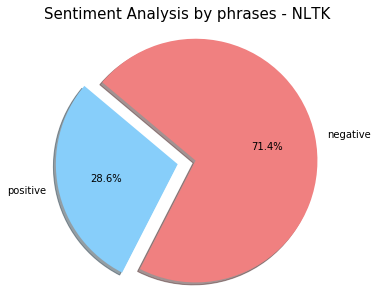

Quantity by paragraph: 9
Quantity by phrases: 28
Quantity by positives phrases: 8
Quantity by negatives phrases: 20


In [80]:
def generate_piechart(df_result):
    
    import matplotlib.pyplot as plt
    labels = df_result.columns.tolist()
    sizes = df_result.values.tolist()[0]
    color = ['lightskyblue', 'lightcoral']
    explode = (0.15, 0)

    fig1, ax1 = plt.subplots(figsize=(5,5))
    ax1.pie(sizes, labels=labels,  explode=explode,
            shadow=True, autopct='%1.1f%%',  startangle=140, colors=color)

    ax1.set_title('Sentiment Analysis by phrases - NLTK', fontsize=15)

    ax1.axis('equal')
    plt.show()
    print("Quantity by paragraph: {}".format(len(paragraph)))
    print("Quantity by phrases: {}".format(len(phrase)-1))
    print("Quantity by positives phrases: {}".format(df_result['positive']
                                                     .values.tolist()[0]))
    
    print("Quantity by negatives phrases: {}".format(df_result['negative']
                                                     .values.tolist()[0]))
    
# Gerar gráfico    
generate_piechart(df_result)